In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
new_grids = np.load('grids.npy')
print(new_grids)

[[  0.           0.         -28.46718856  10.15178184 -13.37586502
   33.06743923]
 [  1.           0.         -28.09000666  10.02777254 -14.17613268
   33.0489391 ]
 [  2.           0.         -27.785178     9.76074108 -14.96469006
   33.05273898]
 ...
 [ 31.           7.         -58.72768558 -19.14249516 -28.72934744
   72.98533528]
 [ 31.           8.         -66.84497124  11.49742224 -31.44899316
   80.6124306 ]
 [ 31.           9.         -47.8253668   32.75456542 -30.05461033
   68.07711137]]


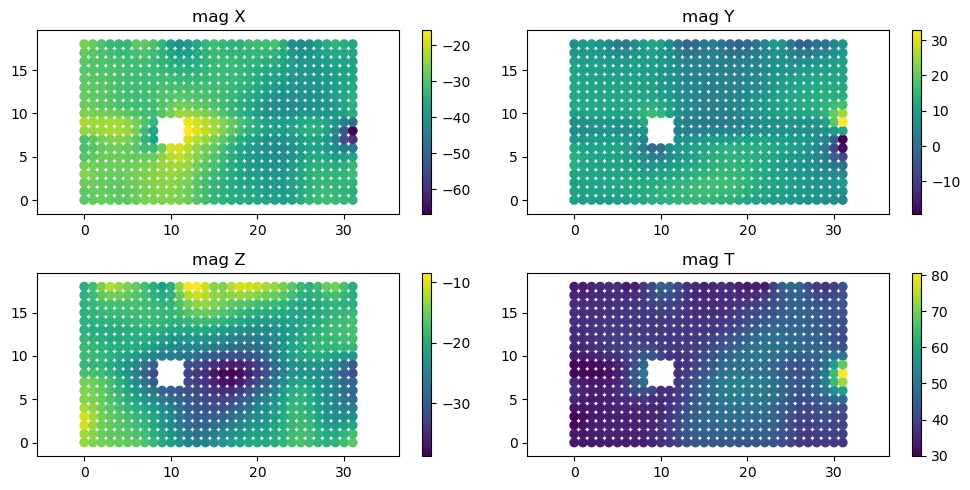

In [4]:
grid_x = new_grids[:, 0]
grid_y = new_grids[:, 1]
grid_magX = new_grids[:, 2]
grid_magY = new_grids[:, 3]
grid_magZ = new_grids[:, 4]
grid_magT = new_grids[:, 5]

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(2, 2, 1)
plt.scatter(grid_x, grid_y, c=grid_magX)
# plt.gca().invert_yaxis()
plt.colorbar()
plt.axis('equal')
plt.title(f'mag X')

fig.add_subplot(2, 2, 2)
plt.scatter(grid_x, grid_y, c=grid_magY)
# plt.gca().invert_yaxis()
plt.colorbar()
plt.axis('equal')
plt.title(f'mag Y')

fig.add_subplot(2, 2, 3)
plt.scatter(grid_x, grid_y, c=grid_magZ)
# plt.gca().invert_yaxis()
plt.colorbar()
plt.axis('equal')
plt.title(f'mag Z')

fig.add_subplot(2, 2, 4)
plt.scatter(grid_x, grid_y, c=grid_magT)
# plt.gca().invert_yaxis()
plt.colorbar()
plt.axis('equal')
plt.title(f'mag T')

plt.tight_layout()
plt.show()

In [5]:
sample_count = np.zeros(len(new_grids))

def balance_sample():
    candidate_idx = np.where(sample_count == np.min(sample_count))[0]
    
    select_idx = np.random.choice(candidate_idx, 1)[0]
    sample_count[select_idx] += 1
    
    return select_idx

In [147]:
# def generate_trajectory(grids, length=10, max_angle=60, min_distance=0.5, max_distance=0.9):
#     def find_neighbor(previous_point, current_point):
#         momentum = current_point[:2] - previous_point[:2]
#         momentum_distance = np.sqrt(np.sum(np.power(momentum, 2), axis=-1))
        
#         grid_vector = grids[:, :2] - current_point[:2]
#         grid_distance = np.sqrt(np.sum(np.power(grid_vector, 2), axis=-1))
        
#         angle = np.arccos(np.sum(grid_vector * momentum, axis=-1) / (grid_distance * momentum_distance + 1e-6)) / np.pi * 180
        
#         condiction = (angle <= max_angle) & (min_distance <= grid_distance) & (grid_distance <= max_distance)
#         if np.any(condiction):
#             candidate = grids[condiction]
#         else:
#             candidate = grids[((min_distance - 0.1) <= grid_distance) & (grid_distance <= (max_distance + 0.1))]
            
#         rnd_idx = np.random.choice(len(candidate), 1)[0]
#         return candidate[rnd_idx]


def generate_trajectory(grids, length=10, max_angle=60, min_distance=0.5, max_distance=0.9):
    def find_neighbor(previous_point, current_point):
        momentum = current_point[:2] - previous_point[:2]
        momentum_distance = np.sqrt(np.sum(np.power(momentum, 2), axis=-1))
        
        grid_vector = grids[:, :2] - current_point[:2]
        grid_distance = np.sqrt(np.sum(np.power(grid_vector, 2), axis=-1))
        
        angle = np.arccos(np.sum(grid_vector * momentum, axis=-1) / (grid_distance * momentum_distance + 1e-6)) / np.pi * 180
        
        condiction = (angle <= max_angle) & (min_distance <= grid_distance) & (grid_distance <= max_distance)
        if np.any(condiction):
            candidate = grids[condiction]
            
            p = 1 / (grid_distance[condiction] + (180 - angle[condiction]) / 180)
            p = p / np.sum(p)
            
            rnd_idx = np.random.choice(len(candidate), size=1, p=p)[0]
        else:
            candidate = grids[((min_distance - 0.1) <= grid_distance) & (grid_distance <= (max_distance + 0.1))]
            rnd_idx = np.random.choice(len(candidate), 1)[0]
        return candidate[rnd_idx]
    
#     rnd_idx = np.random.choice(len(grids), 1)[0]
    rnd_idx = balance_sample()
    prevoius_point = grids[rnd_idx]
    current_point = find_neighbor(prevoius_point, prevoius_point)
    
    traj = [prevoius_point, current_point]

    while len(traj) < length:
        next_point = find_neighbor(prevoius_point, current_point)
        traj.append(next_point)
        
        prevoius_point = current_point
        current_point = next_point
        
    return np.array(traj)

In [154]:
traj_length = 50
training_traj = [generate_trajectory(new_grids, length=traj_length, max_angle=45, min_distance=0.45, max_distance=1.5) for i in range(10)]
training_traj = np.array(training_traj)[:, ::-1]
training_traj.shape

(10, 50, 6)

In [155]:
from time import sleep

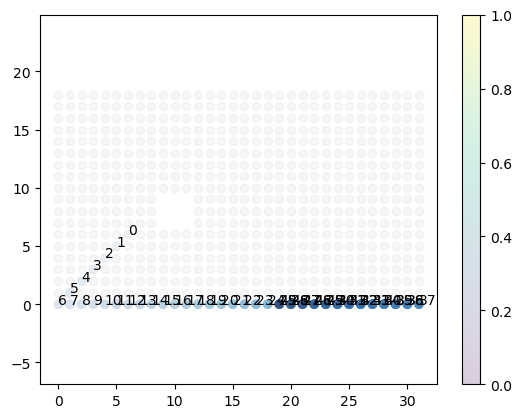

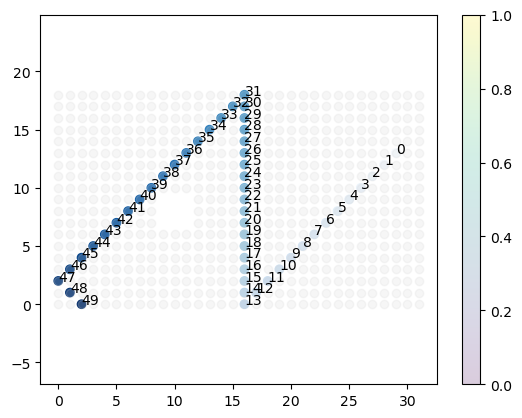

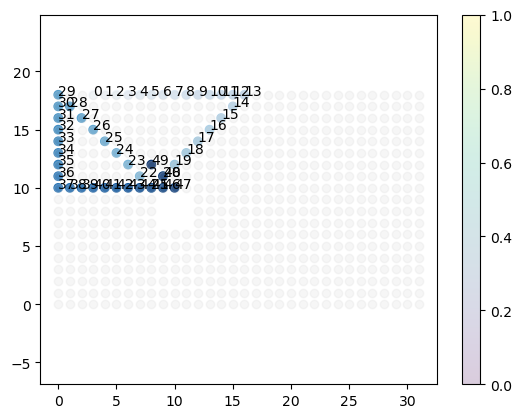

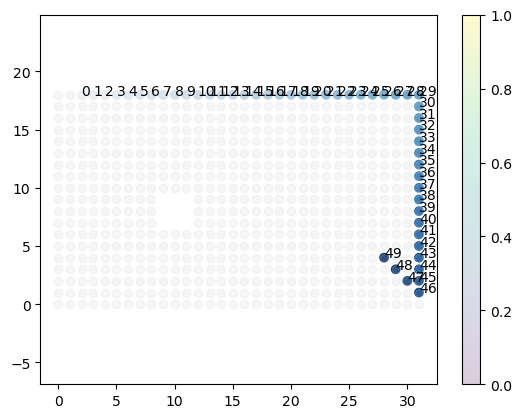

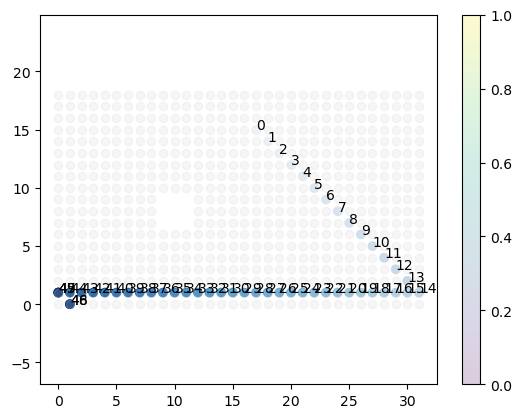

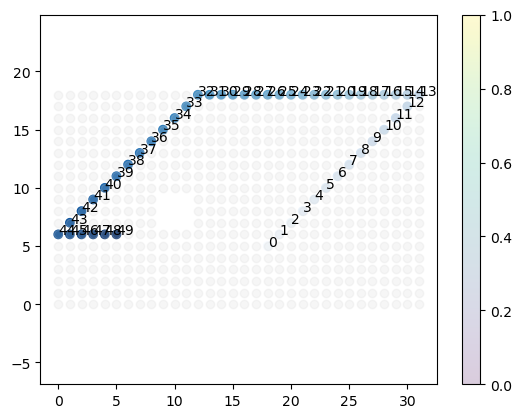

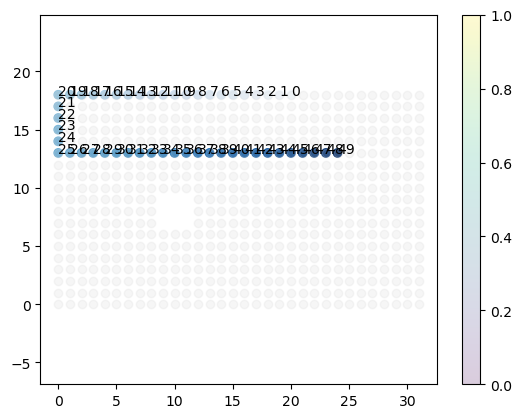

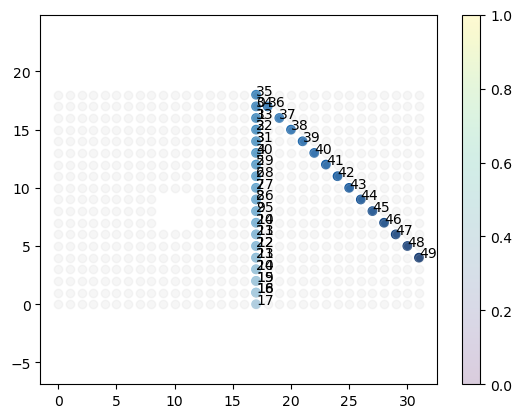

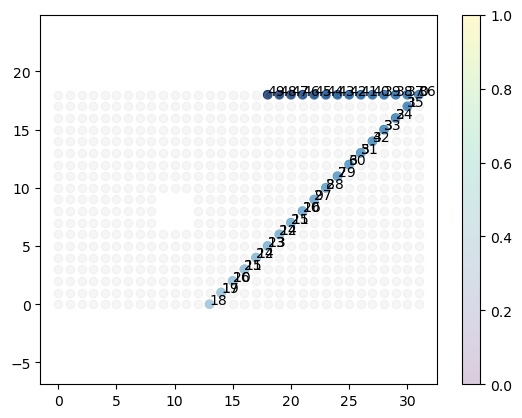

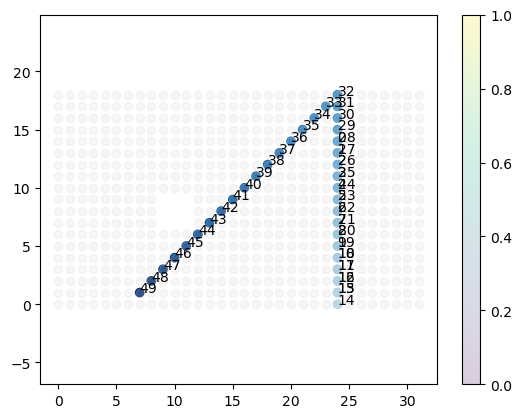

IndexError: index 10 is out of bounds for axis 0 with size 10

<Figure size 640x480 with 0 Axes>

In [156]:
for i in range(1000):
    
    plt.figure()
    plt.scatter(training_traj[i, :, 0].T, training_traj[i, :, 1].T, c=range(0, traj_length), cmap='Blues')
    for j in range(traj_length):
        plt.annotate(j, (training_traj[i, j, 0].T, training_traj[i, j, 1].T))
    plt.scatter(new_grids[:, 0], new_grids[:, 1], c='lightgray', alpha=0.2)
    plt.axis('equal')
    plt.colorbar()
    plt.show()
    sleep(2)

In [ ]:
for i in range(2):
    
    plt.figure()
    plt.scatter(training_traj[i, :, 0].T, training_traj[i, :, 1].T, c=range(0, traj_length), cmap='Blues')
    for j in range(traj_length):
        plt.annotate(j, (training_traj[i, j, 0].T, training_traj[i, j, 1].T))
    plt.axis('equal')
    plt.colorbar()
    plt.show()
    

In [157]:
np.save(f'./training_traj_0.6.npy', training_traj)